https://keras.io/preprocessing/image/

# TensorFlow 2.0

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 복습
- cifar 데이터 프레임 생성 후 csv로 저장하는 것 까지 복습합니다.

In [8]:
import os
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
# 압축 풀기
!unzip -qq /content/drive/"My Drive"/"[AOP:딥러닝 인공지능]"/TEST/"1. [Tensorflow 2.0 과 Pytorch]"/"3. 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch"/"3. dataset"/cifar.zip


In [9]:
# train, test 경로 저장(label 처리를 위한 작업)
train_paths = glob('/content/cifar/train/*.png')
test_paths = glob('/content/cifar/test/*.png')

In [10]:
# 강의와 환경 맞추기
train_paths.sort()
test_paths.sort()

In [14]:
# 테스트용 첫번째 이미지 경로 저장
path = train_paths[0]
path

'/content/cifar/train/0_frog.png'

In [15]:
# 파일 이름만 뽑아봄.
os.path.basename(path)

'0_frog.png'

In [16]:
# 파일 이름만 뽑고, 파일 이름 중 라벨 단어만 추출
def get_class_name(path):
  fname = os.path.basename(path)
  cls_name = fname.replace('.png', '').split('_')[-1]
  return cls_name

In [18]:
# 잘 동작하는지 테스트
cls_name = get_class_name(path)
path, cls_name

('/content/cifar/train/0_frog.png', 'frog')

In [19]:
# 라벨 이름들을 배열로 저장한다.
class_names = [get_class_name(path) for path in train_paths]


In [20]:
# 잘 들어갔는지 확인
len(class_names)

50000

In [21]:
# 데이터를 일부만 확인해보면 당연하게도 중복이 있습니다. 
class_names[:10]

['frog',
 'automobile',
 'frog',
 'frog',
 'ship',
 'ship',
 'cat',
 'deer',
 'frog',
 'airplane']

In [22]:
# 라벨링을 위해 불필요한 중복 요소는 제거합니다. 먼저, 테스트해봅니다.
np.unique(class_names)

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [24]:
# 중복을 제거하면서 return_counts를 통해 중복 라벨 수를 확인해봅니다.
uniques = np.unique(class_names, return_counts=True)
uniques

(array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
        'horse', 'ship', 'truck'], dtype='<U10'),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

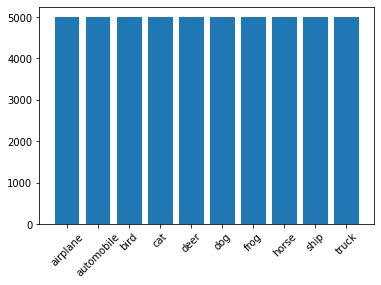

In [25]:
# 시각화도 해볼 수 있습니다.
plt.bar(*uniques)
# 혹은 plt.bar(uniques[0], uniques[1])
plt.xticks(rotation=45) # x축 글자 잘보이게 회전
plt.show()

In [26]:
# 데이터프레임을 생성하기 전에 생김새를 다시 확인해봅니다.
train_paths[0], class_names[0] 

('/content/cifar/train/0_frog.png', 'frog')

In [30]:
# 딕셔너리 먼저 생성
data = {'name': train_paths, 'class': class_names}

In [31]:
# 판다스로 데이터프레임 생성
train_df = pd.DataFrame(data)
train_df.head()

,name,class
0,/content/cifar/train/0_frog.png,frog
1,/content/cifar/train/10000_automobile.png,automobile
2,/content/cifar/train/10001_frog.png,frog
3,/content/cifar/train/10002_frog.png,frog
4,/content/cifar/train/10003_ship.png,ship


In [33]:
# training 데이터를 다룬 것처럼 test 데이터셋도 데이터프레임에 저장해봅니다.
test_names = [get_class_name(path) for path in test_paths]
test_data = {'name': test_paths, 'class': test_names}
test_df = pd.DataFrame(test_data)
test_df.head()

,name,class
0,/content/cifar/test/0_cat.png,cat
1,/content/cifar/test/1000_dog.png,dog
2,/content/cifar/test/1001_airplane.png,airplane
3,/content/cifar/test/1002_ship.png,ship
4,/content/cifar/test/1003_deer.png,deer


In [34]:
# DataFrame을 csv로 저장할건데, 경로를 먼저 지정합니다. 
train_csv_path = '/content/drive/My Drive/[AOP:딥러닝 인공지능]/TEST/1. [Tensorflow 2.0 과 Pytorch]/3. 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/3. dataset/train_dataset.csv'
test_csv_path = '/content/drive/My Drive/[AOP:딥러닝 인공지능]/TEST/1. [Tensorflow 2.0 과 Pytorch]/3. 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/3. dataset/test_dataset.csv'


In [35]:
# 지정한 경로로 데이터를 저장하고, 인덱스 값은 False로 해둡니다. True로 지정하는 경우 인덱스에 0,1,2,3 과 같이 넘버링이 됩니다.
train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)


## Hyperparameter Tunning

In [2]:
num_epochs = 10
batch_size = 32

learning_rate = 0.001

dropout_rate = 0.7

input_shape = (32, 32, 3)
num_classes = 10

## Preprocess

In [4]:
import pandas as pd

In [36]:
# 저장한 csv를 불러옵니다.
train_df = pd.read_csv('/content/drive/My Drive/[AOP:딥러닝 인공지능]/TEST/1. [Tensorflow 2.0 과 Pytorch]/3. 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/3. dataset/train_dataset.csv')
test_df = pd.read_csv('/content/drive/My Drive/[AOP:딥러닝 인공지능]/TEST/1. [Tensorflow 2.0 과 Pytorch]/3. 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/3. dataset/test_dataset.csv')

In [37]:
train_df.head()

,name,class
0,/content/cifar/train/0_frog.png,frog
1,/content/cifar/train/10000_automobile.png,automobile
2,/content/cifar/train/10001_frog.png,frog
3,/content/cifar/train/10002_frog.png,frog
4,/content/cifar/train/10003_ship.png,ship


In [38]:
test_df.head()

,name,class
0,/content/cifar/test/0_cat.png,cat
1,/content/cifar/test/1000_dog.png,dog
2,/content/cifar/test/1001_airplane.png,airplane
3,/content/cifar/test/1002_ship.png,ship
4,/content/cifar/test/1003_deer.png,deer


In [39]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255.,
)

In [40]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='name',
    y_col='class',
    target_size=input_shape[:2],
    batch_size=batch_size
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='name',
    y_col='class',
    target_size=input_shape[:2],
    batch_size=batch_size
)



Found 50000 validated image filenames belonging to 10 classes.
Found 10000 validated image filenames belonging to 10 classes.


## Build Model

In [41]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='categorical_crossentropy',  # Loss Function 
              metrics=['accuracy'])  # Metrics / Accuracy

## Training

In [44]:
#모델 돌리기 전에 데이터 개수 확인해보자!
batch_size, len(train_df) // 32, len(train_generator)

(32, 1562, 1563)

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)